# Changelog

## Version 2

* Load preprocessed dataset
* Use SVC

## Version 1

* Initial code

# Library

In [1]:
import os
import random
import platform

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
!pip freeze > requirements.txt

In [3]:
print('Python version:', platform.python_version())
print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)
print('Matplotlib version:', matplotlib.__version__)
print('Seaborn version:', sns.__version__)
print('Scikit-Learn version:', sklearn.__version__)

Python version: 3.7.6
Numpy version: 1.18.5
Pandas version: 1.0.3
Matplotlib version: 3.2.1
Seaborn version: 0.10.0
Scikit-Learn version: 0.23.1


In [4]:
SEED = 42

os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)

# Dataset

In [5]:
!ls /kaggle/input
!ls /kaggle/input/student-shopee-code-league-marketing-analytics

scl-2020-marketing-analytics  student-shopee-code-league-marketing-analytics
sample_submission_0_1.csv  test.csv  train.csv	users.csv


In [6]:
df_train = pd.read_csv('/kaggle/input/student-shopee-code-league-marketing-analytics/train.csv')
df_train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


In [7]:
df_test = pd.read_csv('/kaggle/input/student-shopee-code-league-marketing-analytics/test.csv')
df_test

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,6,2019-09-29 00:00:00+08:00,127348,53,Never open,4,8,0,0,0,0,0,0,0,0,0,55965
55966,6,2019-09-29 00:00:00+08:00,127396,53,59,802,1207,0,0,1,0,0,0,0,0,0,55966
55967,6,2019-09-29 00:00:00+08:00,127574,43,Never open,7,Never checkout,0,0,0,0,0,0,0,0,0,55967
55968,6,2019-09-29 00:00:00+08:00,127887,43,5,5,6,2,5,14,0,0,0,0,0,0,55968


In [8]:
df_users = pd.read_csv('/kaggle/input/student-shopee-code-league-marketing-analytics/users.csv')
df_users

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
...,...,...,...,...,...,...
127881,127921,NaN,1.0,0.0,NaN,@yahoo.com
127882,127922,1.0,1.0,0.0,20.0,@gmail.com
127883,127923,NaN,1.0,0.0,NaN,@gmail.com
127884,127924,NaN,0.0,0.0,NaN,@gmail.com


# Preprocessed Dataset

In [9]:
!ls /kaggle/input
!ls /kaggle/input/scl-2020-marketing-analytics

scl-2020-marketing-analytics  student-shopee-code-league-marketing-analytics
X_test.csv  X_train.csv  y_train.csv


In [10]:
X_train = pd.read_csv('/kaggle/input/scl-2020-marketing-analytics/X_train.csv')
X_train

,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,attr_1_nan,attr_2_nan,attr_3_nan,age_nan,last_open_day.1,last_login_day.1,last_checkout_day.1
0,44,19.0,6.0,18.0,0,2,4,12,43,99,...,0,0,0,False,False,False,False,19.0,6.0,18.0
1,44,9.0,4.0,8.0,2,9,17,18,48,90,...,0,0,0,False,False,False,False,9.0,4.0,8.0
2,49,14.0,5.0,5.0,0,4,12,24,69,119,...,1,0,0,True,False,False,True,14.0,5.0,5.0
3,49,49.0,9.0,53.0,0,0,1,9,23,69,...,1,0,0,False,False,False,False,49.0,9.0,53.0
4,49,227.0,6.0,221.0,0,0,0,2,5,5,...,0,0,0,True,False,False,True,227.0,6.0,221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,39,24.0,36.0,279.0,0,1,1,0,0,0,...,0,0,0,True,False,False,True,24.0,36.0,279.0
73535,38,46.0,10.0,51.0,0,0,1,0,0,0,...,0,0,0,False,False,False,False,46.0,10.0,51.0
73536,32,-1.0,-1.0,-1.0,0,0,0,0,0,0,...,0,0,0,True,True,False,True,-1.0,-1.0,-1.0
73537,38,5.0,34.0,-1.0,2,4,4,0,0,0,...,0,0,0,False,False,False,False,5.0,34.0,-1.0


In [11]:
y_train = pd.read_csv('/kaggle/input/scl-2020-marketing-analytics/y_train.csv')
y_train = y_train['y'].to_numpy()
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [12]:
X_test = pd.read_csv('/kaggle/input/scl-2020-marketing-analytics/X_test.csv')
X_test

,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,...,domain_@yahoo.com,domain_@ymail.com,domain_other,attr_1_nan,attr_2_nan,attr_3_nan,age_nan,last_open_day.1,last_login_day.1,last_checkout_day.1
0,35,27.0,2.0,13.0,2,3,4,10,34,134,...,0,0,0,True,False,False,True,27.0,2.0,13.0
1,35,7.0,5.0,383.0,1,1,1,5,5,5,...,0,0,0,True,False,False,True,7.0,5.0,383.0
2,25,34.0,1.0,3.0,0,0,0,13,19,38,...,0,0,0,False,False,False,False,34.0,1.0,3.0
3,36,63.0,5.0,5.0,0,0,0,43,110,173,...,1,0,0,False,False,False,False,63.0,5.0,5.0
4,23,6.0,5.0,54.0,0,0,0,4,12,39,...,0,0,0,True,False,False,True,6.0,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,53,-1.0,4.0,8.0,0,0,0,0,0,0,...,0,0,0,True,False,False,True,-1.0,4.0,8.0
55966,53,59.0,802.0,1207.0,0,0,1,0,0,0,...,0,0,0,True,False,False,True,59.0,802.0,1207.0
55967,43,-1.0,7.0,-1.0,0,0,0,0,0,0,...,0,0,0,True,False,False,True,-1.0,7.0,-1.0
55968,43,5.0,5.0,6.0,2,5,14,0,0,0,...,0,0,0,True,False,False,True,5.0,5.0,6.0


# Class Weight

In [13]:
label, label_count = np.unique(y_train, return_counts=True)

lowest_label_count = np.min(label_count)

list_weight = [lowest_label_count/c for c in label_count]

dict_weight = {
    label[0]: list_weight[0],
    label[1]: list_weight[1],
}
list_weight_each = [list_weight[0] if y == 0 else list_weight[1] for y in y_train]
print(dict_weight)
print(list_weight)
print(list_weight_each[:10])

{0: 0.18452716524652482, 1: 1.0}
[0.18452716524652482, 1.0]
[0.18452716524652482, 1.0, 0.18452716524652482, 0.18452716524652482, 0.18452716524652482, 0.18452716524652482, 0.18452716524652482, 0.18452716524652482, 1.0, 0.18452716524652482]


# Model function

In [14]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

def predict(model, X):
    y = model.predict(X)
    return y

def metrics(y_true, y_pred):
    print('F1 Score :', f1_score(y_true, y_pred, average='macro'))
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, [0,1], [0,1])

    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
    plt.show()

# Bernoulli NB

In [15]:
# from sklearn.naive_bayes import BernoulliNB
# clf = BernoulliNB()
# clf.fit(X_train, y_train, list_weight_each)

In [16]:
# y_train_pred = predict(clf, X_train)
# metrics(y_train, y_train_pred)

In [17]:
# y_test_pred = predict(clf, X_test)

# df_submission = pd.concat(
#     [pd.Series(range(0, len(X_test)), name='row_id'), pd.Series(y_test_pred, name='open_flag')], axis=1)
# df_submission.to_csv('submission_BernoulliNB.csv', index=False)

# df_submission

# SVC

In [18]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=1, cache_size=10240, class_weight='balanced')
clf.fit(X_train, y_train)

SVC(C=1, cache_size=10240, class_weight='balanced')

F1 Score : 0.7184077888897338
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     62083
           1       0.47      0.62      0.54     11456

    accuracy                           0.83     73539
   macro avg       0.70      0.75      0.72     73539
weighted avg       0.86      0.83      0.84     73539



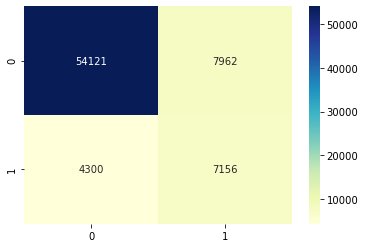

In [19]:
y_train_pred = predict(clf, X_train)
metrics(y_train, y_train_pred)

In [20]:
y_test_pred = predict(clf, X_test)

df_submission = pd.concat(
    [pd.Series(range(0, len(X_test)), name='row_id'), pd.Series(y_test_pred, name='open_flag')], axis=1)
df_submission.to_csv('submission_SVC.csv', index=False)

df_submission

,row_id,open_flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
55965,55965,0
55966,55966,1
55967,55967,0
55968,55968,1
